## GERDA LIGHT
This notebook is meant to test out and use the reduced  version of GERDA.

The "Light" version build upon the synthetic population created with the orginial GERDA by using the agent_information Dataframe (*ai.df) and the contact table p_l_t, which states the location ID for all agents for all timesteps (hours) for one week.

Worklfow:
- create a new world object 
- initialize a model with this world object
- set seed infections
- simulate the model 


PS.: ## - comment,  # - hide lines


In [2]:
import GERDA_light as gl 
import numpy as np
import logging as log
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [4]:
logger = log.getLogger()
logger.setLevel(log.INFO)
logger.disabled = True


In [5]:
## initialize a world 
w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           )
w2 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=True,
           k_I=0.2,
           )


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
model = gl.SIS_model(w1)#no clustering
i = 1   # selected agent ID 
model.world.agents[i].state=1 ## infect one agent
model.world.agents[i].times['infection'] = 0 
model.run(timespan=2000, only_inf_rel_contacts=True)

iter:  1


In [8]:
## initialize a model 
model1 = gl.SIS_model(w1)#no clustering
model2 = gl.SIS_model(w2)#clustering

## infect an agent 
for model in [model1,model2]:
    i = 1   # selected agent ID 
    model.world.agents[i].state=1 ## infect one agent
    model.world.agents[i].times['infection'] = 0 


iter:  1
iter:  70


In [10]:
## run a simulation
for model in [model1,model2]:
    model.run(timespan=2000, only_inf_rel_contacts=True)

IndexError: index -41 is out of bounds for axis 0 with size 31

In [11]:
ai_df_1 = model1.world.ai_df
ai_df_2 = model2.world.ai_df
display(ai_df_1.head(5))
display(ai_df_2.head(5))


,home,h_ID,type,age,cluster,household_size,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,400,4,1,1000.0,0,1000.0
1,152,265,under_age,16,265,5,1,727.0,0,727.0
2,205,373,public_worker,34,373,2,1,1087.0,0,1087.0
3,564,1059,adult,53,1059,2,1,555.0,0,555.0
4,100,177,adult,40,177,2,1,947.0,0,947.0


,home,h_ID,type,age,household_size,cluster,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,4,83,4,629.0,0,629.0
1,152,265,under_age,16,5,220,5,521.0,0,521.0
2,205,373,public_worker,34,2,194,2,427.0,0,427.0
3,564,1059,adult,53,2,31,2,452.0,0,452.0
4,100,177,adult,40,2,8,8,327.0,0,327.0


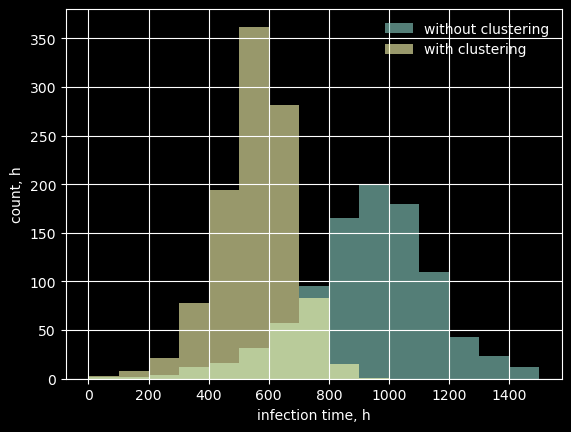

In [12]:
import numpy as np
ai_df_1['infection_time'].hist(alpha=0.6,label='without clustering',bins=np.arange(0,1600,100))
ai_df_2['infection_time'].hist(alpha=0.6,label='with clustering', bins=np.arange(0,1600,100))
plt.xlabel('infection time, h')
plt.ylabel('count, h')
plt.legend(frameon=False)

iter:  1
iter:  70
iter:  1
iter:  70
iter:  1
iter:  70
iter:  1
iter:  70
iter:  1
iter:  70


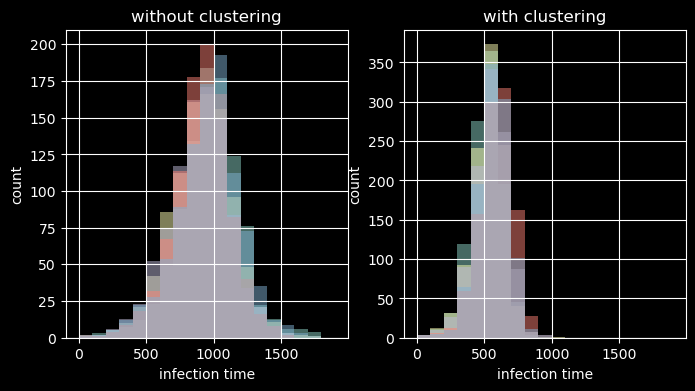

In [13]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
inf_times = []
for k in range(5):
    for l,model in enumerate([model1,model2]):
        model.reset()
        i = 1   # selected agent ID 
        model.world.agents[i].state=1 ## infect one agent
        model.world.agents[i].times['infection'] = 0
        model.run(timespan=2000)
        inf_times.append(model.world.ai_df[['h_ID','infection_time']])
        model.world.ai_df['infection_time'].hist(alpha=0.5, ax = axes[l], bins=np.arange(0,2000,100))

axes[0].set_title(f'without clustering')
axes[1].set_title(f'with clustering')
for ax in axes:
    ax.set_ylabel('count')
    ax.set_xlabel('infection time')
     

array([[<Axes: title={'center': 'infection_time'}>]], dtype=object)

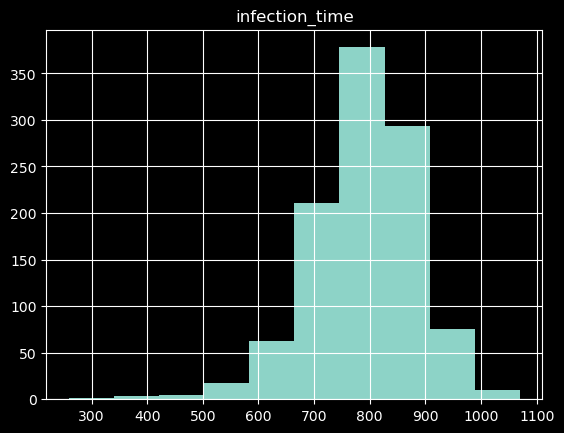

In [13]:
import pandas as pd
ai_combined = pd.concat(inf_times,axis=0)
#pd.merge(on='h_ID')
ai_combined.groupby('h_ID').mean().hist()